In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_ind = pd.read_csv('economic_index.csv')

In [3]:
df_ind.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df_ind.drop(columns=["Unnamed: 0","year","month"], axis=1) #removign unwanted columns

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [5]:
df_ind.drop(columns=["Unnamed: 0","year","month"], axis=1, inplace=True) 
# remvoing unwanted columns and updating the dataframe

In [6]:
df_ind.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df_ind.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

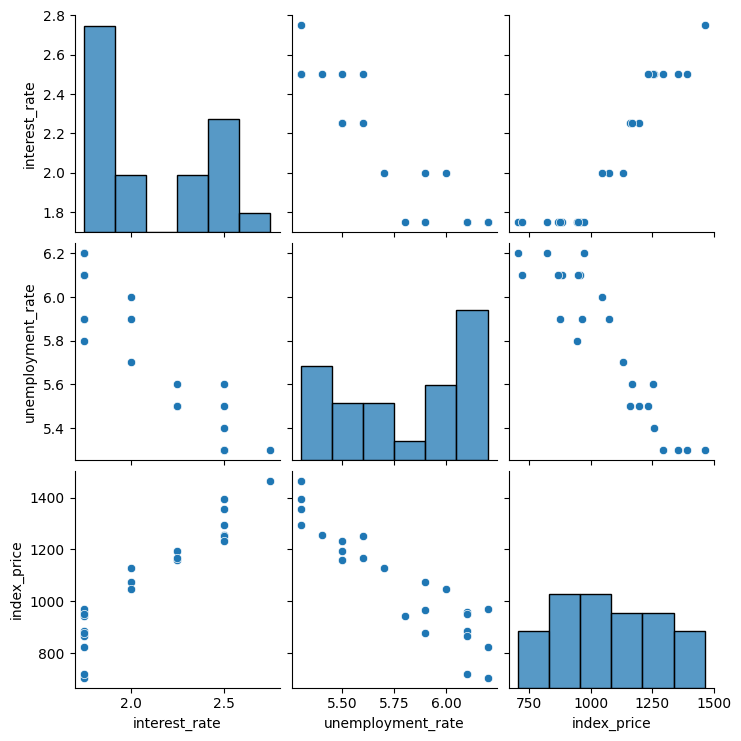

In [8]:
import seaborn as sns
sns.pairplot(df_ind)

In [9]:
df_ind.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [10]:
# separating the independent and dependent variables
X = df_ind[['interest_rate','unemployment_rate']]
# Another way is X = df.iloc[:,:-1] -> all rows and all columns except the last column
Y = df_ind['index_price']
# Another way is Y = df.iloc[:,-1] -> all rows and only the last column

In [11]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [12]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split

In [13]:
Xtrain, xt, Ytrain, yt = train_test_split(X,Y, test_size=0.25, random_state=42)

In [14]:
Xtrain.shape, xt.shape, Ytrain.shape, yt.shape

((18, 2), (6, 2), (18,), (6,))

In [15]:
Xtrain.head()

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3


In [16]:
# regplot -> regression plot
# this plot is used to see the relationship between the independent and dependent variables
# it is the scatter plot with the regression line
import seaborn as sns

In [17]:
# sns.regplot(df_ind['interest_rate'],df_ind['unemployment_rate'])
# don't know why this is not working

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
xt = scaler.transform(xt)

In [20]:
from sklearn.linear_model import LinearRegression
regre = LinearRegression()

In [21]:
regre.fit(Xtrain,Ytrain)

LinearRegression()

In [22]:
# taught something about cross validation but not able to understand it
from sklearn.model_selection import cross_val_score
score = cross_val_score(regre, Xtrain, Ytrain,scoring='neg_mean_squared_error' ,cv=3)

In [23]:
np.mean(score)

np.float64(-5914.828180162386)

In [24]:
ypred = regre.predict(xt)

In [25]:
ypred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [27]:
mse = mean_squared_error(yt,ypred)
mae = mean_absolute_error(yt, ypred)
rmse = np.sqrt(mse)
r_score = r2_score(yt, ypred)
ar = 1 - (1-r_score)*(len(yt) - 1)/(len(yt) - xt.shape[1] - 1)
print(mse, mae, rmse, r_score, ar)

5793.762887712569 59.935781523235484 76.11677139574805 0.8278978091457145 0.7131630152428576


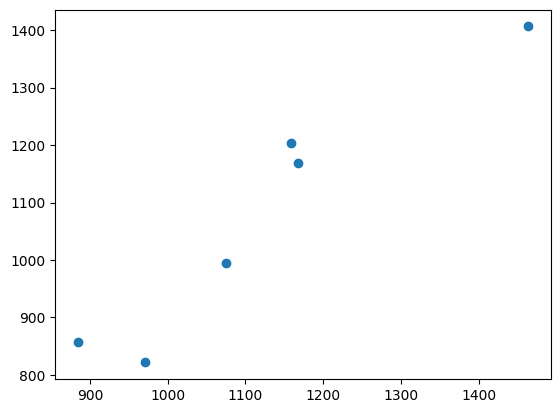

In [28]:
#Assumptions
plt.scatter(yt,ypred)

In [29]:
resi = yt - ypred
print(resi)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


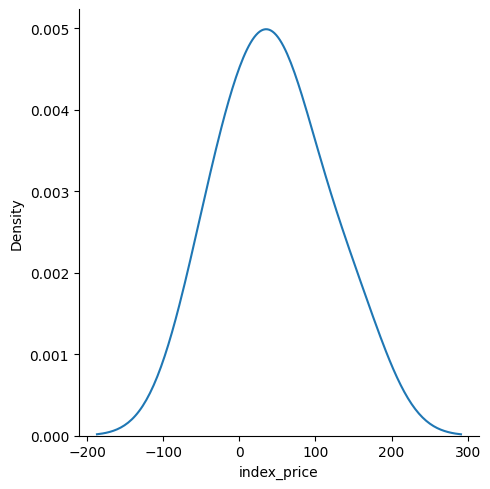

In [30]:
sns.displot(resi, kind='kde')

In [31]:
print(regre.coef_)

[  88.27275507 -116.25716066]


In [32]:
import statsmodels.api as sm
model = sm.OLS(Ytrain, Xtrain).fit()

In [33]:
model.summary()

d:\JIIT College\Python & ML\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 02 Nov 2024   Prob (F-statistic):                       0.754
Time:                        18:37:10   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""